<a href="https://colab.research.google.com/github/PriankaKibria17/Priankas_Coding/blob/main/Practice_Recreate_Int_vs_Principal_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
filename = '/content/drive/MyDrive/data/mortgages.csv'
Mortgage_30YR = pd.read_csv(filename)
Mortgage_30YR.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


# get the 30 year mortgage payment table at different interest rates

In [6]:
# getting the 30 year mortgage names only
mortgagefilter = Mortgage_30YR['Mortgage Name'] == '30 Year'

In [7]:
#checking the interest rates 
Mortgage_30YR['Interest Rate'].value_counts()

0.03    540
0.05    540
Name: Interest Rate, dtype: int64

In [8]:
# filtering only 0.03% rates
interestfilter = Mortgage_30YR['Interest Rate'] == 0.03

In [9]:
# naming my filters so that I can obtain 0.03 and 0.05%
mortgage30_05 = Mortgage_30YR[mortgagefilter & ~interestfilter] # i want all the mortgages where 0.03 is NOT TRUE. So i can only get 0.05 (just the 30 year mort with 5%)
mortgage30_03 = Mortgage_30YR.loc[mortgagefilter & interestfilter, :] # i want all the mortgages that have 0.03% int rate (just the 30 year mort with a 3$ int)

In [10]:
# I want to see 30 year mortgages with a 0.03 rate
mortgage30_03.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [11]:
mortgage30_05.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


In [12]:
# cumalative interest paid using .cumsum() this is what will be plotted 
mortgage30_05['Interest Paid'].cumsum()

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

In [13]:
mortgage30_03['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

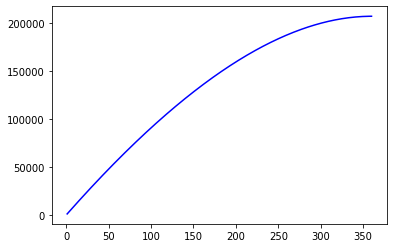

In [17]:
#we want to graph the cumulative sum of the interest paid
#plotting for the 3% interest 30 year mortgage
plt.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b');

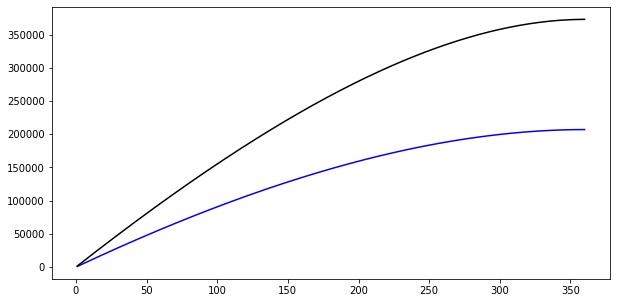

In [23]:
#using subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) ) # naming my figure and axes I want 1 row (nrow = 1) and columns ncoles =1
#and my figure size to be 10  x 5
# now plotting 30 year mortgage at 3%. Time is always in X axis (Month is time)
# c=color we want the color to be blue
axes.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b'); #b = blue
# using the same code for 05 but changing the information to 05's; K = blk
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k');

OR you can do this:

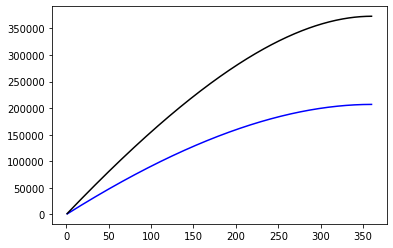

In [25]:
plt.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b');
plt.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k');